# NATURAL GAS PRICE PREDICTION USING IBM WATSON MACHINE LEARNING SERVICE

# Importing the Libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data into a Pandas DataFrame for further analysis

In [138]:
data=pd.read_csv('../data/naturalgas.csv')
data

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18


First 5 entries of the data

In [139]:
data.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


Splitting the Date into 3 columns

In [140]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [141]:
data.drop('Date',axis=1,inplace=True)

In [142]:
data

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


# Handling Null Values

In [143]:
data.isnull().any()

Price     True
year     False
month    False
day      False
dtype: bool

As it is continuous data so we are checking it is normal distribution or skewed distribution?

c:\users\gowra\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

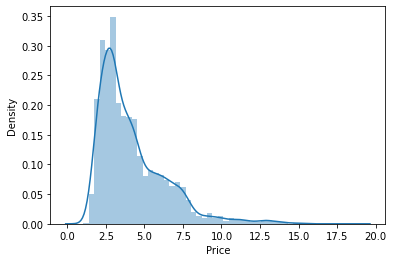

In [144]:
sns.distplot(data['Price'].dropna())

As we got Skew distribution curve so we are filling NULL values with median

In [145]:
data['Price'].fillna(data['Price'].median(),inplace=True)

In [146]:
data.isnull().sum()

Price    0
year     0
month    0
day      0
dtype: int64

In [147]:
data.describe()

,Price,year,month,day
count,5938.000000,5938.000000,5938.000000,5938.000000
mean,4.189121,2008.366959,6.468003,15.712193
std,2.191042,6.825348,3.415981,8.742158
min,1.050000,1997.000000,1.000000,1.000000
25%,2.660000,2002.000000,4.000000,8.000000
50%,3.540000,2008.000000,6.000000,16.000000
75%,5.240000,2014.000000,9.000000,23.000000
max,18.480000,2020.000000,12.000000,31.000000


# Finding and Removing Outliers

c:\users\gowra\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

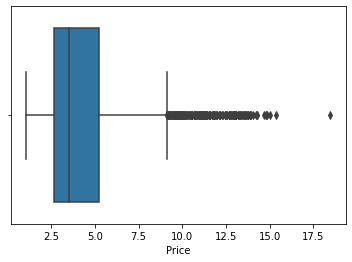

In [148]:
sns.boxplot(data['Price'])

In [149]:
from scipy import stats

In [150]:
z=np.abs(stats.zscore(data))
z

array([[0.16848238, 1.6655437 , 1.600847  , 0.99665627],
       [0.17761123, 1.6655437 , 1.600847  , 0.8822584 ],
       [0.26433526, 1.6655437 , 1.600847  , 0.76786053],
       ...,
       [0.93074095, 1.70453149, 0.44851721, 0.99665627],
       [0.91704769, 1.70453149, 0.44851721, 0.65346267],
       [0.91248326, 1.70453149, 0.44851721, 0.5390648 ]])

In [151]:
threshold=3
np.where(z>threshold)

(array([1534, 1535, 1538, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171,
        2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184,
        2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195,
        2196, 2197, 2198, 2199, 2200, 2209, 2210, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2231, 2232, 2233, 2234, 2820, 2821, 2822, 2825,
        2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836,
        2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847,
        2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858,
        2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869,
        2870, 2871, 2872, 2873, 2874, 2875, 2876], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [152]:
df_no_outliers=data[(z<=3).all(axis=1)]
df_no_outliers

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13
...,...,...,...,...
5933,2.23,2020,8,5
5934,2.26,2020,8,6
5935,2.15,2020,8,7
5936,2.18,2020,8,10


In [153]:
df_no_outliers.shape

(5821, 4)

# Data Visualization

Scatter Plot

No handles with labels found to put in legend.


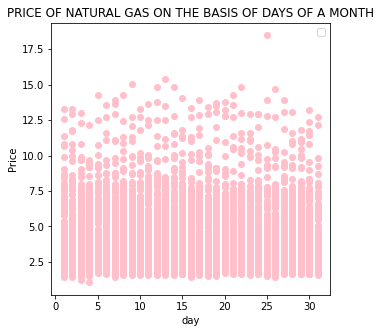

In [154]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['day'],data['Price'],color='pink')
plt.xlabel('day')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
plt.legend()

No handles with labels found to put in legend.


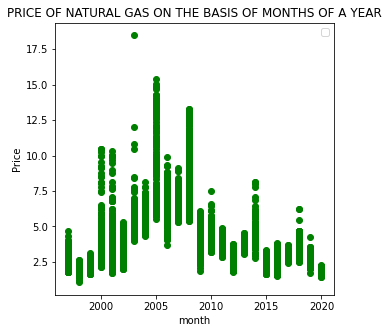

In [155]:
fig=plt.figure(figsize=(5,5))
plt.scatter(data['year'],data['Price'],color='green')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

HEAT MAP

<AxesSubplot:>

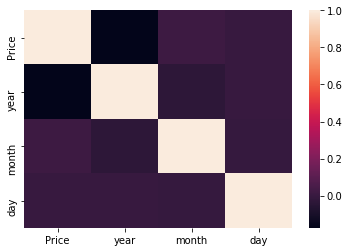

In [156]:
sns.heatmap(data.corr())

BAR GRAPH

No handles with labels found to put in legend.


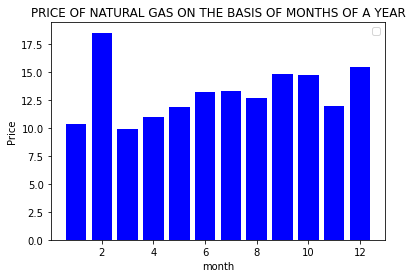

In [157]:
plt.bar(data['month'],data['Price'],color='blue')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

LINE GRAPH

<AxesSubplot:xlabel='year', ylabel='Price'>

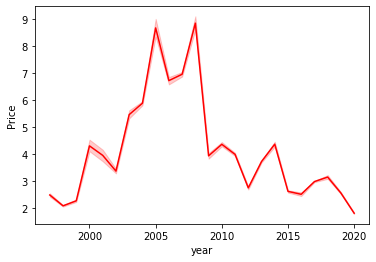

In [158]:
sns.lineplot(x='year',y='Price',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Price'>

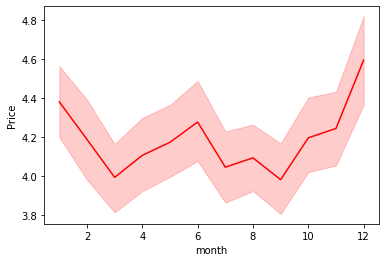

In [159]:
sns.lineplot(x='month',y='Price',data=data,color='red')

<AxesSubplot:xlabel='day', ylabel='Price'>

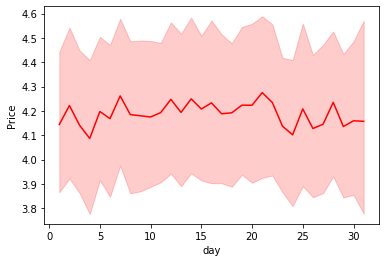

In [160]:
sns.lineplot(x='day',y='Price',data=data,color='red')

HISTOGRAM

<AxesSubplot:>

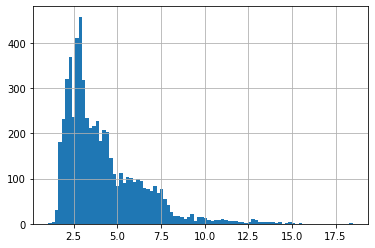

In [161]:
data['Price'].hist(bins=90)

BOX PLOT

<AxesSubplot:title={'center':'Price'}, xlabel='month'>

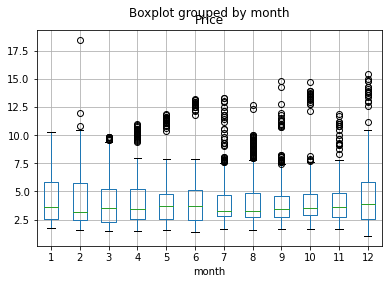

In [162]:
data.boxplot(column='Price',by='month')

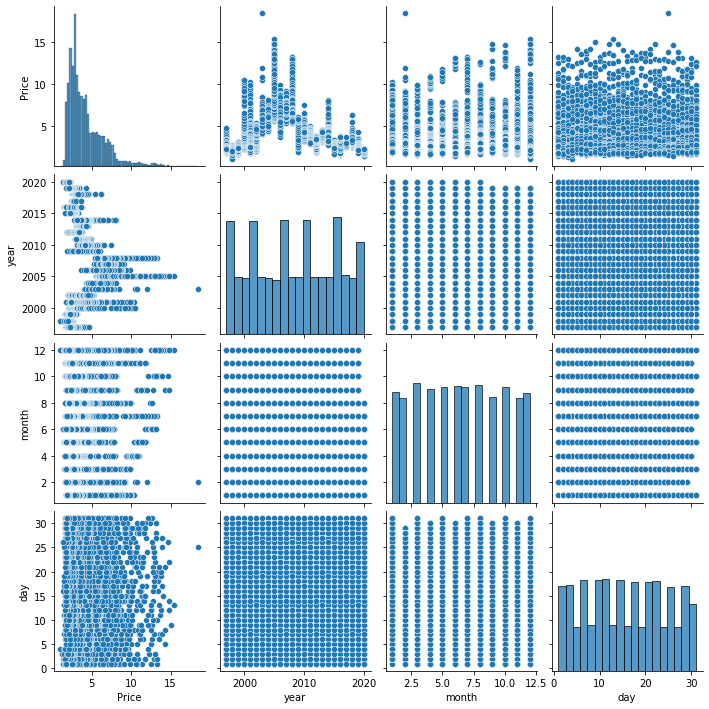

In [163]:
sns.pairplot(data)
plt.show()

# separating dependent and independent variables

In [164]:
x=data.iloc[:,1:4].values
y=data.iloc[:,0].values
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

In [165]:
y

array([3.82, 3.8 , 3.61, ..., 2.15, 2.18, 2.19])

In [166]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,    7],
       [2020,    8,   10],
       [2020,    8,   11]], dtype=int64)

# Encoding

Since in our dataset we are having all the columns as numerical value, there isn't any requirement for encoding.

# Standardizing

In [167]:
import joblib
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)
joblib.dump(x,'../models/standarscaler.save')
x

array([[-1.6655437 , -1.600847  , -0.99665627],
       [-1.6655437 , -1.600847  , -0.8822584 ],
       [-1.6655437 , -1.600847  , -0.76786053],
       ...,
       [ 1.70453149,  0.44851721, -0.99665627],
       [ 1.70453149,  0.44851721, -0.65346267],
       [ 1.70453149,  0.44851721, -0.5390648 ]])

# Train and Test


In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [169]:
x_train.shape

(4750, 3)

In [170]:
y_train.shape

(4750,)

# Model Building


## Decision Tree Regressor

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

### Performing Hyper tuning for DecisionTreeRegressor

In [172]:
DecisionTreeRegressor()
df_grid = GridSearchCV(DecisionTreeRegressor(),param_grid = {'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],'splitter': ['best', 'random'],'max_depth': range(1, 11),'min_samples_split': range(10, 60, 10),},cv=5,n_jobs=1,scoring='neg_mean_squared_error')
df_grid.fit(x_train, y_train)
print(df_grid.best_params_)

C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 10, 'splitter': 'best'}


C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  FitFailedWarning)
C:\Users\gowra\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partiti

In [173]:
df=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=10,splitter='best')
df.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [174]:
y_pred_df=df.predict(x_test)
y_pred_df

array([3.11933333, 2.88277228, 8.24      , ..., 2.15      , 3.708     ,
       4.6204878 ])

In [175]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [176]:
from sklearn.metrics import r2_score
accur_df=r2_score(y_test,y_pred_df)
print(accur_df)

0.9748852419473413


Saving the DecisionTreeRegressor model into the folder via joblib library.

In [177]:
import joblib
joblib.dump(df,"../models/DecisionTreeRegressor.save")

['../models/DecisionTreeRegressor.save']

### Visualization of the Decision Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.647736 to fit



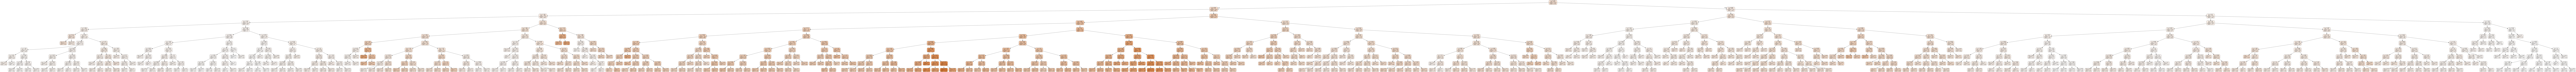

In [178]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(df, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest Regerssor

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
rfr = RandomForestRegressor(n_estimators=1, random_state=10)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
y_pred_rfr

array([3.54, 3.04, 7.4 , ..., 2.16, 3.77, 4.35])

In [181]:
y_test

array([3.56, 3.02, 7.26, ..., 2.09, 4.01, 4.46])

In [182]:
accur_rfr=r2_score(y_test,y_pred_rfr)
print(accur_rfr)

0.9773693648709125


In [196]:

req=[[2021, 1, 20]]
req=sc.fit_transform(req)
rfr.predict(req)
req


array([[0., 0., 0.]])

Saving the RandomForestRegressor model into the folder via joblib library.

In [184]:
joblib.dump(rfr,"../models/RandomForestRegressor.save")

['../models/RandomForestRegressor.save']

# Model Evaluation for Decision Tree Regressor

In [185]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred_df)

0.21435522699781953

In [186]:
mean_squared_error(y_test,y_pred_df)

0.1330631627486958

In [187]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred_df))

0.36477823776740825

# Model Evaluation for Random Forest Regressor


In [188]:
mean_absolute_error(y_test,y_pred_rfr)

0.18007575757575758

In [189]:
mean_squared_error(y_test,y_pred_rfr)

0.11990176767676768

In [190]:
sqrt(mean_squared_error(y_test,y_pred_rfr))

0.3462683463396094

from the evaluation report we can see that the Random Forest Regressor is more closer to zero.